In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Lectura de datos

In [3]:
# path a los archivos de datos
path_pozos = "datos/capitulo-iv-pozos.csv"
path_produccion_2024 = "datos/produccin-de-pozos-de-gas-y-petrleo-2024.csv"
path_no_convencionales = "datos/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv"

In [4]:
# lectura de datos
pozos = pd.read_csv(path_pozos)
produccion_2024 = pd.read_csv(path_produccion_2024)
no_convencionales = pd.read_csv(path_no_convencionales)

/var/folders/gf/9p2mg5dd6pl1j3xx9354sj7r0000gp/T/ipykernel_21482/442322738.py:3: DtypeWarning: Columns (16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  produccion_2024 = pd.read_csv(path_produccion_2024)


# Análisis exploratorio

## Pozos

In [5]:
pozos.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,255.00,1702.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,251.00,1350.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.15,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.70,1351.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.00,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...


In [6]:
# transformacion de tipo fechas
col_fechas = ["adjiv_fecha_inicio_perf", "adjiv_fecha_fin_perf", "adjiv_fecha_inicio_term", "adjiv_fecha_fin_term"]
for col in col_fechas:
    pozos[col] = pd.to_datetime(pozos[col], format="%Y-%m-%d")

In [7]:
pozos.shape

(84332, 26)

In [8]:
area_to_cod_area = pozos.groupby('area')['cod_area'].nunique()
area_one_to_one = (area_to_cod_area <= 1).all()
area_one_to_one

np.False_

In [9]:
area_cod_mayor_uno = set(area_to_cod_area[area_to_cod_area > 1].index)

In [10]:
heatmap_areas_codigos = pozos[pozos['area'].isin(area_cod_mayor_uno)][["area", "cod_area"]].pivot_table(index="area", columns="cod_area", aggfunc="size", fill_value=0)

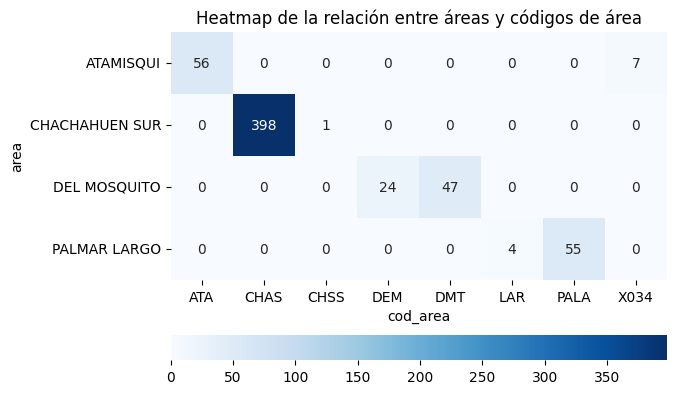

In [11]:
# plot heatmap_areas_codigos
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_areas_codigos, cmap="Blues", annot=True, fmt="d", cbar=True, cbar_kws={'orientation': 'horizontal'})
plt.title("Heatmap de la relación entre áreas y códigos de área")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [12]:
pozos[(pozos["area"] == "ATAMISQUI") & (pozos["cod_area"] == "X034")]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
7950,EQ-1,39234,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1067.28,1897.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.55920000000...",0101000020E610000016FBCBEEC92351C008AC1C5A64CF...
7951,EQ-2,39235,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1072.60,1538.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.53522999999...",0101000020E6100000A3755435412251C0CCD1E3F736D9...
7952,M.EQ.x-4,39236,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1181.40,2104.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.61368000000...",0101000020E6100000658D7A88462751C01D7233DC80CF...
7954,M.EQ.a-6,39238,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1150.93,2125.0,No informado,No informado,No informado,No informado,no,Otro tipo,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.63120999999...",0101000020E61000001FBAA0BE652851C005FA449E24CD...
7956,YPF.Md.EQ.x-8,39240,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1144.64,2244.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.58921999999...",0101000020E61000008B89CDC7B52551C04D672783A3D4...
7957,YPF.Md.EQ.x-10,39241,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1107.00,2191.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.56901000000...",0101000020E61000003546EBA86A2451C0CEC29E76F8CB...
25482,YPF.Md.LNG.x-1,77771,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1080.43,1814.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.53776999999...",0101000020E610000046B1DCD26A2251C0A6ED5F5969D2...


In [13]:
print(pozos["geojson"].values)

['{"type":"Point","coordinates":[-68.287852999999998,-45.591132999999999]}'
 '{"type":"Point","coordinates":[-68.292018999999996,-45.592025]}'
 '{"type":"Point","coordinates":[-68.283878000000001,-45.590243999999998]}'
 ...
 '{"type":"Point","coordinates":[-68.437469998014095,-38.471764120899202]}'
 '{"type":"Point","coordinates":[-71.338610000000003,-50.531959999999998]}'
 '{"type":"Point","coordinates":[-67.865780000000001,-38.018329999999999]}']


/var/folders/gf/9p2mg5dd6pl1j3xx9354sj7r0000gp/T/ipykernel_21482/3424492612.py:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


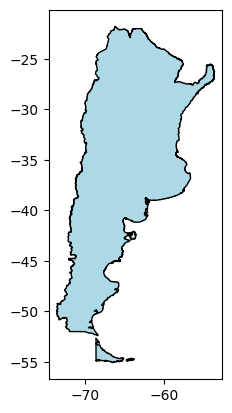

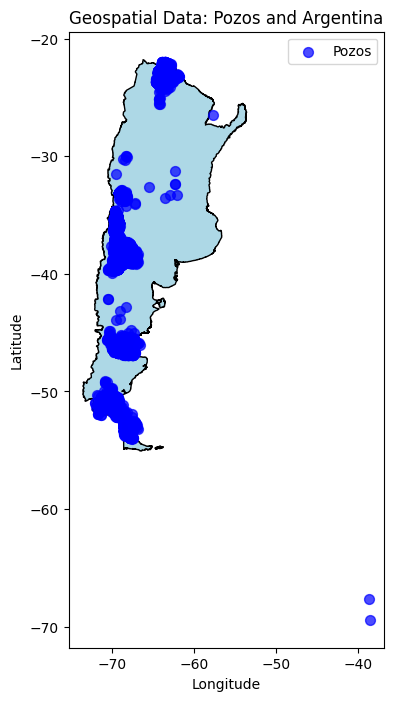

In [14]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point
import json

# Extract coordinates from the geojson column
def extract_coordinates(geojson_str):
    geojson = json.loads(geojson_str)
    return geojson['coordinates']

pozos['coordinates'] = pozos['geojson'].apply(extract_coordinates)
pozos['longitude'] = pozos['coordinates'].apply(lambda x: x[0])
pozos['latitude'] = pozos['coordinates'].apply(lambda x: x[1])

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(pozos['longitude'], pozos['latitude'])]
pozos_gdf = gpd.GeoDataFrame(pozos, geometry=geometry, crs="EPSG:4326")

argentina = geojson_data = gpd.read_file("argentina.geojson")
argentina.plot(ax=plt.gca(), color='lightblue', edgecolor='black')

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the argentina GeoDataFrame
argentina.plot(ax=ax, color='lightblue', edgecolor='black', label="Argentina")

# Plot the pozos GeoDataFrame
pozos_gdf.plot(ax=ax, color='blue', marker='o', markersize=50, label="Pozos", alpha=0.7)

# Customize the plot
plt.title("Geospatial Data: Pozos and Argentina")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Show the plot
plt.show()

Hay dos pozos en el medio de la nada

In [34]:
pozos[pozos["longitude"] > -40]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude


Parece que latitud y longitud están intercambiados

In [32]:
# Extract coordinates from the geojson column
import json

def extract_coordinates(geojson_str):
    geojson = json.loads(geojson_str)
    return geojson['coordinates']

pozos['coordinates'] = pozos['geojson'].apply(extract_coordinates)
pozos['longitude'] = pozos['coordinates'].apply(lambda x: x[0])
pozos['latitude'] = pozos['coordinates'].apply(lambda x: x[1])

In [33]:
# swap long and lat of idpozo 10143 and 162058 and 4613 and 80786
pozos.loc[pozos["idpozo"] == 10143, ["latitude", "longitude"]] = pozos.loc[pozos["idpozo"] == 10143, ["longitude", "latitude"]].values
pozos.loc[pozos["idpozo"] == 162058, ["latitude", "longitude"]] = pozos.loc[pozos["idpozo"] == 162058, ["longitude", "latitude"]].values

In [38]:
pozos.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,255.00,1702.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...,"[-68.287853, -45.591133]",-68.287853,-45.591133
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,251.00,1350.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...,"[-68.292019, -45.592025]",-68.292019,-45.592025
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.15,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...,"[-68.283878, -45.590244]",-68.283878,-45.590244
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.70,1351.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...,"[-68.289483, -45.594069]",-68.289483,-45.594069
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.00,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...,"[-68.294475, -45.59445]",-68.294475,-45.594450


/var/folders/gf/9p2mg5dd6pl1j3xx9354sj7r0000gp/T/ipykernel_21482/1018470191.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


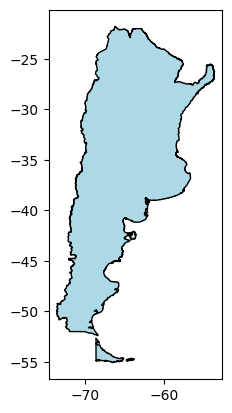

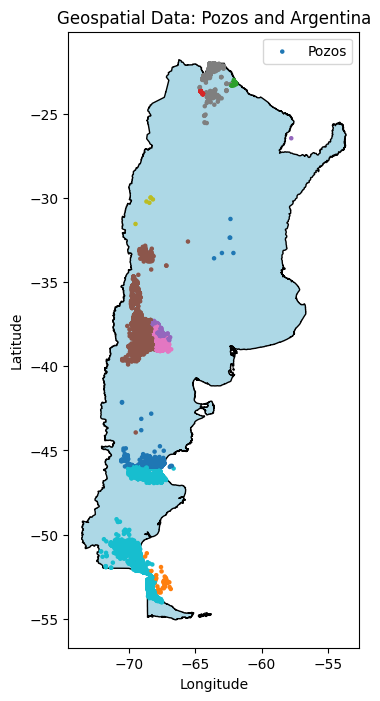

In [40]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(pozos['longitude'], pozos['latitude'])]
pozos_gdf = gpd.GeoDataFrame(pozos, geometry=geometry, crs="EPSG:4326")

argentina = geojson_data = gpd.read_file("argentina.geojson")
argentina.plot(ax=plt.gca(), color='lightblue', edgecolor='black')

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the argentina GeoDataFrame
argentina.plot(ax=ax, color='lightblue', edgecolor='black', label="Argentina")

# Plot the pozos GeoDataFrame use pozos["provincia"] as hue for color
pozos_gdf.plot(ax=ax, column="provincia", legend=True, legend_kwds={'loc': 'upper left'}, markersize=5, label="Pozos", alpha=1)

# Customize the plot
plt.title("Geospatial Data: Pozos and Argentina")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Show the plot
plt.show()

In [41]:
pozos["provincia"].value_counts()

provincia
Santa Cruz          23615
Chubut              22306
Neuquén             18682
Mendoza              8853
Rio Negro            5749
La Pampa             2724
Tierra del Fuego     1242
Salta                 965
Estado Nacional        73
Formosa                65
Jujuy                  46
San Juan                6
Córdoba                 6
Name: count, dtype: int64

## Produccion no convencional

In [44]:
no_convencionales.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,132738,0.000,32.777,1.47,0.0,0.0,0.0,0.0,30.92,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1036,PREC,2750.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.193743,-39.078336,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2015,1,136137,2.590,494.570,11.50,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1199(d),PREC,3375.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.224930,-38.867937,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
2,YSUR,2018,1,132604,0.000,43.771,0.00,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.Gu-1189d,PREC,2647.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.241585,-38.871419,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2017,1,137602,0.000,444.020,51.01,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2017-02-16 13:45:37.233373,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1186(h)(I),BASA,3524.0,basamento,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.245305,-38.853815,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2017-01-31
4,YSUR,2018,1,132492,14.353,430.948,25.89,0.0,0.0,0.0,0.0,31.00,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1030,PREC,2752.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.185218,-39.078200,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31


## Produccion 2024

In [48]:
diff_cols_2024 = set(produccion_2024.columns) - set(no_convencionales.columns)
diff_cols_no_conv = set(no_convencionales.columns) - set(produccion_2024.columns)
diff_cols_2024, diff_cols_no_conv

(set(), {'coordenadax', 'coordenaday'})

In [45]:
produccion_2024.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Reserva de Gas,Gasífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.BLO.es-1,FIMP,1963.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.PS.x-1,FIMP,1600.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDR.x-1,PROS,2058.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
